Training Logistic Regression...
Evaluating Logistic Regression...
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.46      0.52        35
           1       0.42      0.56      0.48        25

    accuracy                           0.50        60
   macro avg       0.51      0.51      0.50        60
weighted avg       0.52      0.50      0.50        60


Training Random Forest...
Evaluating Random Forest...
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.51      0.55        35
           1       0.41      0.48      0.44        25

    accuracy                           0.50        60
   macro avg       0.50      0.50      0.49        60
weighted avg       0.51      0.50      0.50        60


Training Neural Network...


C:\Users\bahra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5757 - loss: 0.6854 - val_accuracy: 0.6250 - val_loss: 0.6650
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5016 - loss: 0.7007 - val_accuracy: 0.6250 - val_loss: 0.6808
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5116 - loss: 0.6852 - val_accuracy: 0.6667 - val_loss: 0.6784
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5704 - loss: 0.6727 - val_accuracy: 0.6250 - val_loss: 0.6773
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6161 - loss: 0.6532 - val_accuracy: 0.5417 - val_loss: 0.6811
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5945 - loss: 0.6523 - val_accuracy: 0.6250 - val_loss: 0.6792
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6488 - loss: 0.6354 - val_accuracy: 0.6667 - val_loss: 0.6754
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6324 - loss: 0.6460 - val_accuracy: 0.6667 - val_loss: 0.6804
Ep

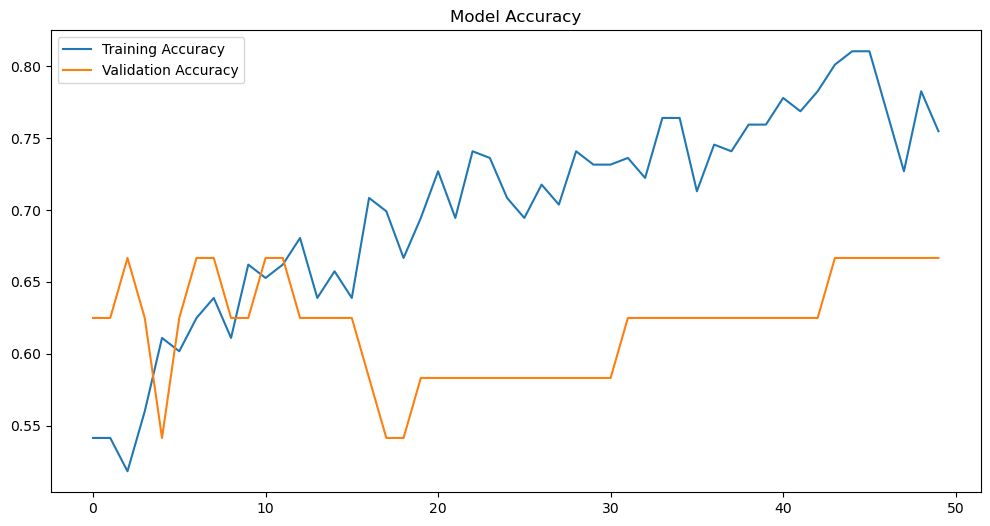

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Data Preprocessing
def load_data(file_path):
    """Load the dataset."""
    return pd.read_csv(file_path)

def preprocess_data(data):
    """Handle missing values and scale features."""
    # Fill missing values
    data.fillna(data.median(), inplace=True)
    
    # Separate features and target
    X = data.drop(columns=['target'])  # Adjust 'target' column as per dataset
    y = data['target']
    
    # Normalize numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
def train_logistic_regression(X_train, y_train):
    """Train a Logistic Regression model."""
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

# Random Forest
def train_random_forest(X_train, y_train):
    """Train a Random Forest model."""
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Neural Network
def build_nn(input_shape):
    """Build a neural network."""
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_nn(model, X_train, y_train, X_val, y_val):
    """Train the neural network."""
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)
    return model, history

# Evaluation and Visualization
def evaluate_model(model, X_test, y_test):
    """Evaluate the model and print metrics."""
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_training_history(history):
    """Plot training and validation accuracy/loss."""
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()
    plt.show()

# Main Function
if __name__ == "__main__":
    # Load and preprocess data
    data = load_data("heart_disease.csv")  # Replace with your dataset path
    X_train, X_test, y_train, y_test = preprocess_data(data)
    
    # Logistic Regression
    print("Training Logistic Regression...")
    lr_model = train_logistic_regression(X_train, y_train)
    print("Evaluating Logistic Regression...")
    evaluate_model(lr_model, X_test, y_test)
    
    # Random Forest
    print("\nTraining Random Forest...")
    rf_model = train_random_forest(X_train, y_train)
    print("Evaluating Random Forest...")
    evaluate_model(rf_model, X_test, y_test)
    
    # Neural Network
    print("\nTraining Neural Network...")
    X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train, y_train, test_size=0.1)
    nn_model = build_nn((X_train.shape[1],))
    nn_model, history = train_nn(nn_model, X_train_nn, y_train_nn, X_val_nn, y_val_nn)
    print("Evaluating Neural Network...")
    y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int).flatten()
    print("Accuracy:", accuracy_score(y_test, y_pred_nn))
    print("Classification Report:\n", classification_report(y_test, y_pred_nn))
    
    # Plot NN Training
    plot_training_history(history)
